In [57]:
### Load the required liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [1]:
!pip install comet_ml

In [2]:
import comet_ml

ModuleNotFoundError: No module named 'comet_ml'

In [2]:
data = pd.read_csv(r"D:\Data_analytics_new\Sub5_Machine_Learning\Credit-Card-Fraud-Detection-Model1\data\cleaned_data\train_raw2.csv")

In [3]:
data.head(2)

,Unnamed: 0,trans_num,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,is_fraud,age_bkt
0,0,0b242abb623afc578575680df30655b9,2019-01-01,12AM-6AM,CN - 2703186189652095,less than 5 dollar,misc_net,F,NC,0.068,0.870,Medium_pop,31,0,b/w 25 to 40
1,1,1f76529f8574734946361c461b024d99,2019-01-01,12AM-6AM,CN - 630423337322,b/w 80 to 150 dollar,grocery_pos,F,WA,0.271,0.024,Low_pop,41,0,b/w 40 to 60


In [4]:
data["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [5]:
data["gender_encod"] = data["gender"].apply(lambda x: 1 if x=="M" else 0)

In [6]:
data.head(2)

,Unnamed: 0,trans_num,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,is_fraud,age_bkt,gender_encod
0,0,0b242abb623afc578575680df30655b9,2019-01-01,12AM-6AM,CN - 2703186189652095,less than 5 dollar,misc_net,F,NC,0.068,0.870,Medium_pop,31,0,b/w 25 to 40,0
1,1,1f76529f8574734946361c461b024d99,2019-01-01,12AM-6AM,CN - 630423337322,b/w 80 to 150 dollar,grocery_pos,F,WA,0.271,0.024,Low_pop,41,0,b/w 40 to 60,0


In [19]:
df = data.copy()

In [20]:
df.set_index("trans_num", inplace=True)

#### One Hot Encoding for categorical data

In [30]:
# 1. One-Hot Encoding (convert categorical to numerical)
encoder = OneHotEncoder(drop='first', sparse=False)# sparse=False for pandas compatibility
cat_col = ['time_bucket','category','amount_bkt','population_bkt','age_bkt',]
drop_col = cat_col +["trans_date","cc_num","gender","state","age",'Unnamed: 0']
X_encoded = encoder.fit_transform(data[cat_col])
encoded_feat_name = encoder.get_feature_names_out(cat_col)
encoded_df = pd.DataFrame(X_encoded, columns=encoded_feat_name, index=df.index)
data_processed = df.drop(columns=drop_col)
final_df = pd.concat([data_processed, encoded_df], axis=1)


c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming final_df is your preprocessed DataFrame with all features
# Select only the numeric columns (excluding target variable if it exists)
numeric_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
X_vif = final_df[numeric_cols]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(len(X_vif.columns))]

# Sort by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Display results
print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)

Variance Inflation Factor (VIF) Analysis:
                            feature       VIF
6              time_bucket_6PM-12AM  3.933486
4              time_bucket_12PM-6PM  3.906287
0              latitudinal_distance  3.726707
1             longitudinal_distance  3.718795
8            category_gas_transport  2.319766
27        population_bkt_Medium_pop  2.252264
10             category_grocery_pos  2.174909
28             age_bkt_b/w 40 to 60  2.094188
23  amount_bkt_b/w 80 to 150 dollar  2.090427
12                    category_home  2.052139
26           population_bkt_Low_pop  2.017900
13               category_kids_pets  1.979495
21    amount_bkt_b/w 5 to 10 dollar  1.964657
18            category_shopping_pos  1.945359
24    amount_bkt_less than 5 dollar  1.899429
5              time_bucket_6AM-12PM  1.879616
22   amount_bkt_b/w 60 to 80 dollar  1.854102
20   amount_bkt_b/w 40 to 60 dollar  1.837694
3                      gender_encod  1.820040
16           category_personal_care  1

c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


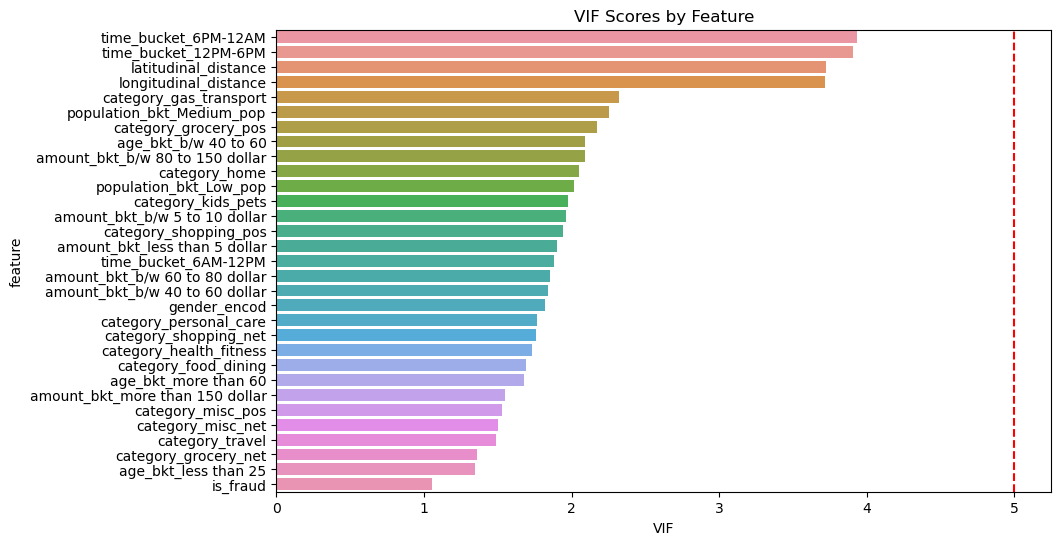

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='VIF', y='feature', data=vif_data)
plt.axvline(x=5, color='red', linestyle='--')
plt.title("VIF Scores by Feature")
plt.show()

### SMOTE For Balancing the Dataset

In [42]:
X = final_df.drop(columns="is_fraud")
y = final_df.is_fraud

In [43]:
# 1. Split data (before any resampling!)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [44]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(972506, 30)
(324169, 30)
(972506,)
(324169,)


In [45]:
# 2. Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr

In [48]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1933754, 30)
(1933754,)


In [49]:
#### Modelling

from sklearn.linear_model import LogisticRegression

In [50]:
logit_model = LogisticRegression(solver="liblinear")
logit_model.fit(X_train_resampled,y_train_resampled)

c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

LogisticRegression(solver='liblinear')

In [51]:
feature = pd.DataFrame()
feature['columns'] = X_train_resampled.columns
feature['importance'] = logit_model.coef_[0]
feature.sort_values(by="importance", ascending=False, inplace=True)
feature

,columns,importance
7,category_gas_transport,4.868829
8,category_grocery_net,3.876196
24,amount_bkt_more than 150 dollar,3.529581
14,category_misc_pos,2.443002
6,category_food_dining,2.267480
9,category_grocery_pos,2.129912
15,category_personal_care,2.053146
18,category_travel,1.988786
13,category_misc_net,1.714253
12,category_kids_pets,1.700508


In [52]:
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, 
                            classification_report, mean_absolute_error,
                            mean_squared_error, median_absolute_error)

# 1. Training and Test Scores
print(f"Training Accuracy: {logit_model.score(X_train_resampled, y_train_resampled):.2%}")
print(f"Test Accuracy: {logit_model.score(X_val, y_val):.2%}")

# 2. Predictions
Y_pred = logit_model.predict(X_val)  # Ensure X_test_std is properly standardized

# 3. Error Metrics
print("\nError Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_val, Y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_val, Y_pred):.4f}")
print(f"Median Absolute Error: {median_absolute_error(y_val, Y_pred):.4f}")

# 4. Classification Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy_score(y_val, Y_pred):.2%}")
print(f"Weighted F1 Score: {f1_score(y_val, Y_pred, average='weighted'):.2%}")

# 5. Additional Important Metrics for Imbalanced Data
print("\nDetailed Classification Report:")
print(classification_report(y_val, Y_pred, target_names=['Non-Fraud', 'Fraud']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, Y_pred))

c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

Training Accuracy: 89.30%


c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr

Test Accuracy: 86.72%

Error Metrics:
Mean Absolute Error: 0.1328
Mean Squared Error: 0.1328
Median Absolute Error: 0.0000

Classification Metrics:
Accuracy: 86.72%


c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr

Weighted F1 Score: 92.35%

Detailed Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.87      0.93    322292
       Fraud       0.04      0.91      0.07      1877

    accuracy                           0.87    324169
   macro avg       0.52      0.89      0.50    324169
weighted avg       0.99      0.87      0.92    324169


Confusion Matrix:
[[279421  42871]
 [   175   1702]]


c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr

In [56]:
from sklearn.metrics import roc_auc_score
Y_probs = logit_model.predict_proba(X_val)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_val, Y_probs):.4f}")

c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ROC-AUC Score: 0.9485


c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Oliver\anaconda4\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arr